

<h2 align="center">Predicting Sales Revenue </h2>

###  Loading the Data and Importing Libraries
---

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](https://trevorhastie.github.io/ISLR/data.html)

In [6]:
# taking a look at
ad_data= pd.read_csv('Advertising.csv')
ad_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Task 3: Remove the index column

In [13]:
ad_data.drop(['Unnamed: 0'],axis=1,inplace=True)
ad_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Task 4: Exploratory Data Analysis

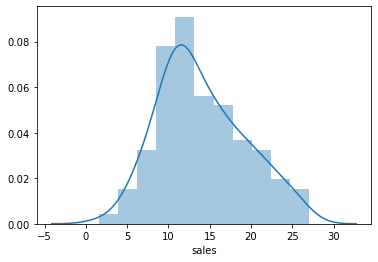

In [14]:
import seaborn as sns
sns.distplot(ad_data.sales)

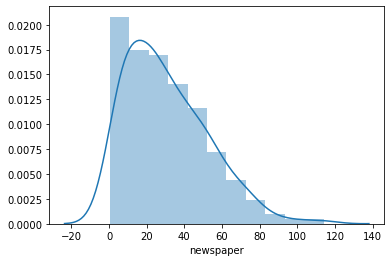

In [15]:
sns.distplot(ad_data.newspaper)

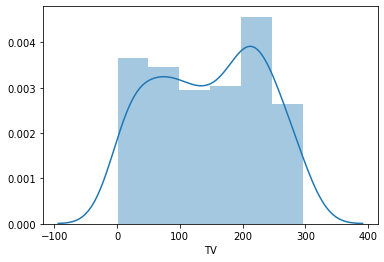

In [16]:
sns.distplot(ad_data.TV)

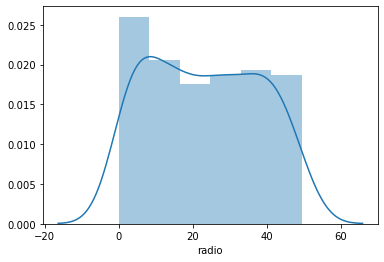

In [17]:
sns.distplot(ad_data.radio)

In [ ]:
# Sales seems to be normally distributed. The amount of spending on newspaper ads is low compared to the spending on TV and 
# radio advertisements

### Task 5: Exploring Relationships between Predictors and Response

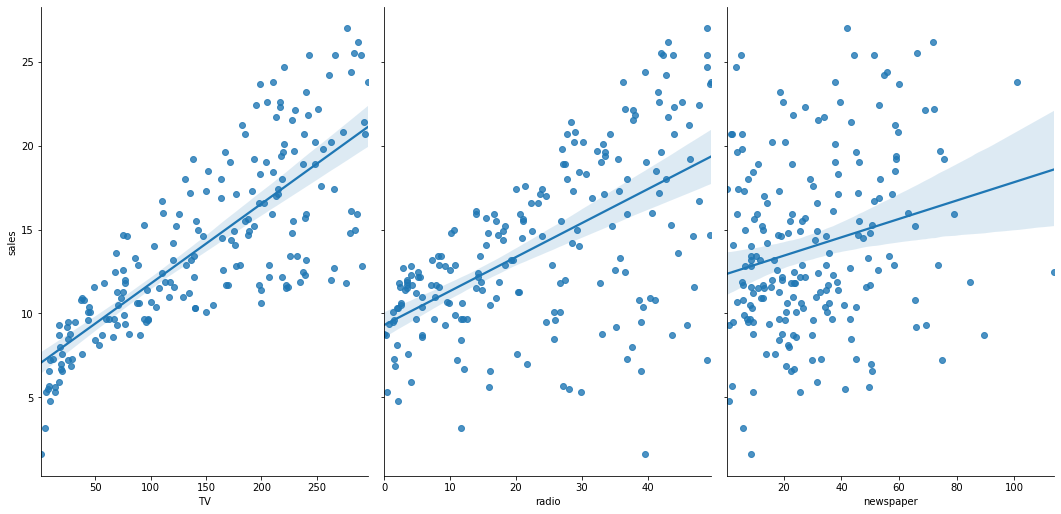

In [30]:
sns.pairplot(data=ad_data,x_vars= ['TV','radio','newspaper'], y_vars='sales',kind='reg',height= 7,aspect=0.7)

**There is a strong relationship between sales and TV advertising spend**

In [37]:
# checking the correlation
ad_data.TV.corr(ad_data.sales)

0.7822244248616061

In [36]:
ad_data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


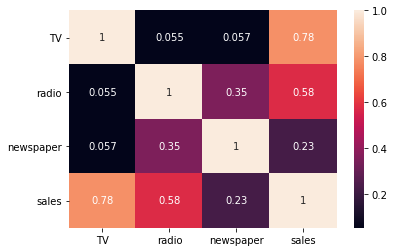

In [39]:
sns.heatmap(ad_data.corr(),annot=True)

We can see that the TV variable correlates the most with sales. So we could use this in our linear regression model

### Task 6: Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [41]:
X= ad_data[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [43]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [44]:
y= ad_data.sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test= train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Task 7: Interpreting Model Coefficients

In [59]:
print(model.intercept_)
print(model.coef_)

6.91197261886872
[0.04802945]


In [ ]:
'''an increase in TV ad spending is correlated with an increase in sales by 0.048 units.  So if there was a £1000 increase
on TV ads, there would be an increase in sales of 48 units ''' 

### Task 8: Making Predictions with our Model

In [63]:
y_pred= model.predict(X_test)
y_pred[:5]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

### Task 9: Model Evaluation

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae= mean_absolute_error(y_test,y_pred)
print(mae)

2.4643080986027908


**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [72]:
mse= mean_squared_error(y_test,y_pred)
print(mse)

10.310069587813155


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [73]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

3.210929707703542
